# Bayes vs Simpson

Copyright 2016 Allen Downey

MIT License: http://opensource.org/licenses/MIT

In [1]:
from __future__ import print_function, division

%matplotlib inline
%precision 3

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

from thinkbayes2 import Suite, Beta
from thinkbayes2 import MakeMixture

import thinkplot

In [2]:
def make_beta(hits, at_bats, alpha=1, beta=1, label=None):
    beta = Beta(alpha, beta, label)
    beta.Update((hits, at_bats-hits))
    return beta

0.49999999999999983


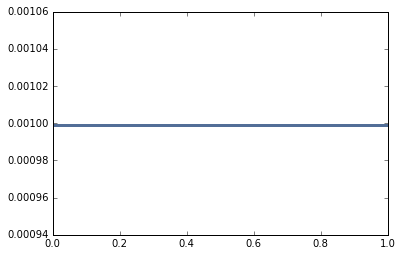

In [3]:
prior = make_beta(0, 0, 1, 1).MakePmf(steps=1001, label='prior')
print(prior.Mean())
thinkplot.Pdf(prior)

In [4]:
def compare(beta1, beta2, xlabel, steps=1001):
    pmf1 = beta1.MakePmf(steps=steps)
    pmf2 = beta2.MakePmf(steps=steps)
    print(pmf1.MAP(), pmf2.MAP())
    print('%3.3f %3.3f' % (pmf1.Mean(), pmf2.Mean()))
    print('%3.3f' % (pmf1 > pmf2))
    thinkplot.Pdfs([pmf1, pmf2])
    thinkplot.Config(xlabel=xlabel,
                    ylabel='PMF')

0.25 0.253
0.260 0.254
0.515


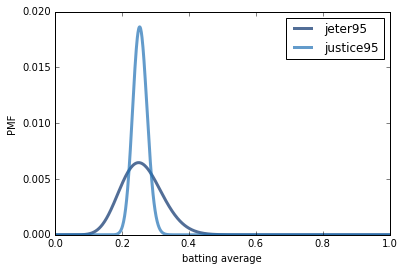

In [5]:
xlabel = 'batting average'
jeter95 = make_beta(12, 48, label='jeter95')
justice95 = make_beta(104, 411, label='justice95')
compare(jeter95, justice95, xlabel)

0.314 0.321
0.315 0.324
0.420


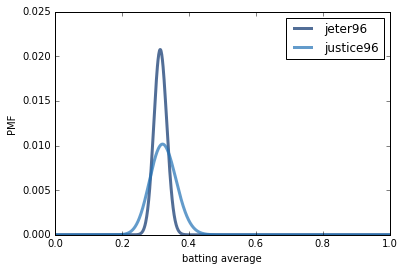

In [6]:
jeter96 = make_beta(183, 582, label='jeter96')
justice96 = make_beta(45, 140, label='justice96')
compare(jeter96, justice96, xlabel)

0.31 0.27
0.310 0.271
0.927


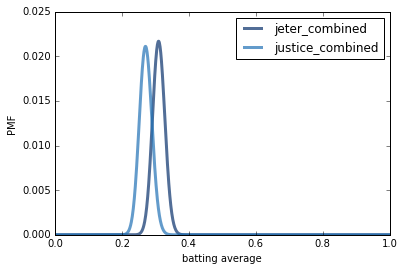

In [7]:
jeter_combined = make_beta(195, 630, label='jeter_combined')
justice_combined = make_beta(149, 551, label='justice_combined')
compare(jeter_combined, justice_combined, xlabel)

0.24242424242424235


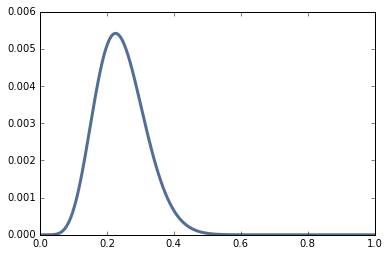

In [8]:
prior = make_beta(0, 0, 8, 25).MakePmf(steps=1001, label='prior')
print(prior.Mean())
thinkplot.Pdf(prior)

0.241 0.251
0.247 0.252
0.443


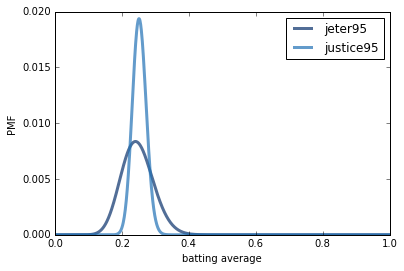

In [9]:
alphas = 8, 25
jeter95 = make_beta(12, 48, *alphas, label='jeter95')
justice95 = make_beta(104, 411, *alphas, label='justice95')
compare(jeter95, justice95, xlabel)

0.31 0.304
0.311 0.306
0.543


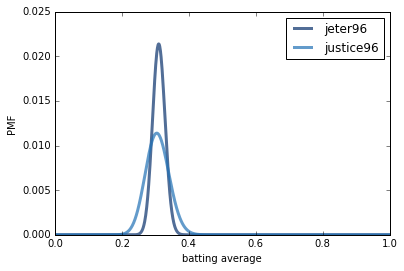

In [10]:
jeter96 = make_beta(183, 582, *alphas, label='jeter96')
justice96 = make_beta(45, 140, *alphas, label='justice96')
compare(jeter96, justice96, xlabel)

0.306 0.268
0.306 0.269
0.925


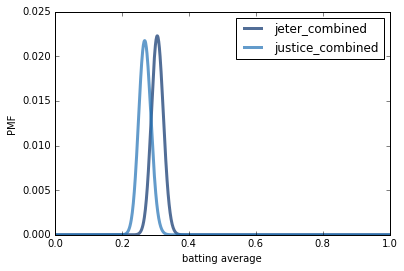

In [11]:
jeter_combined = make_beta(195, 630, *alphas, label='jeter_combined')
justice_combined = make_beta(149, 551, *alphas, label='justice_combined')
compare(jeter_combined, justice_combined, xlabel)

0.931 0.867
0.921 0.864
0.940


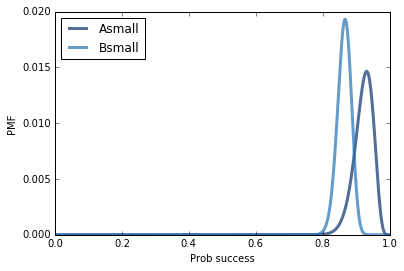

In [12]:
alphas = 1, 1
xlabel = 'Prob success'
Asmall = make_beta(81, 87, *alphas, label='Asmall')
Bsmall = make_beta(234, 270, *alphas, label='Bsmall')
compare(Asmall, Bsmall, xlabel)
thinkplot.config(loc='upper left')

0.73 0.687
0.728 0.683
0.778


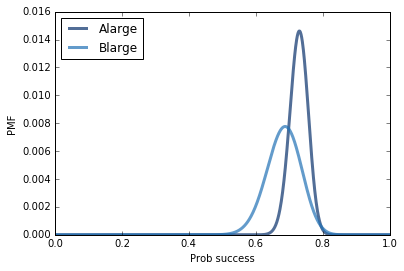

In [13]:
Alarge = make_beta(192, 263, *alphas, label='Alarge')
Blarge = make_beta(55, 80, *alphas, label='Blarge')
compare(Alarge, Blarge, xlabel)

0.78 0.826
0.778 0.824
0.063


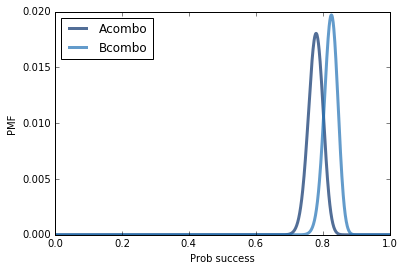

In [14]:
Acombo = make_beta(273, 350, *alphas, label='Acombo')
Bcombo = make_beta(289, 350, *alphas, label='Bcombo')
compare(Acombo, Bcombo, xlabel)

0.8333318055553011


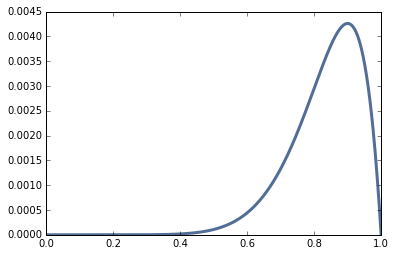

In [15]:
prior = make_beta(0, 0, 10, 2).MakePmf(steps=1001, label='prior')
print(prior.Mean())
thinkplot.Pdf(prior)

0.928 0.868
0.919 0.865
0.936


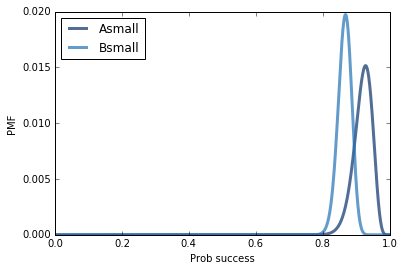

In [16]:
alphas = 10, 2
xlabel = 'Prob success'
Asmall = make_beta(81, 87, *alphas, label='Asmall')
Bsmall = make_beta(234, 270, *alphas, label='Bsmall')
compare(Asmall, Bsmall, xlabel)
thinkplot.config(loc='upper left')

0.736 0.711
0.735 0.707
0.689


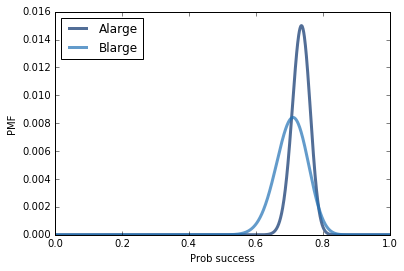

In [17]:
Alarge = make_beta(192, 263, *alphas, label='Alarge')
Blarge = make_beta(55, 80, *alphas, label='Blarge')
compare(Alarge, Blarge, xlabel)

0.783 0.828
0.782 0.826
0.064


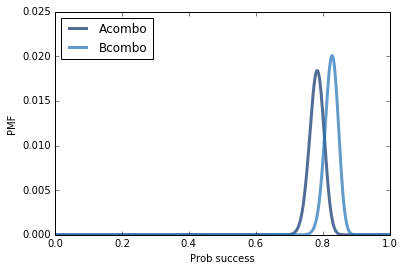

In [18]:
Acombo = make_beta(273, 350, *alphas, label='Acombo')
Bcombo = make_beta(289, 350, *alphas, label='Bcombo')
compare(Acombo, Bcombo, xlabel)

In [19]:
class Kidney(Suite):
    def __init__(self, alpha, beta, label=None):
        pmf = Beta(alpha, beta, label).MakePmf(steps=1001)
        Suite.__init__(self, pmf)
        
    def Likelihood(self, data, hypo):
        hits, at_bats = data
        misses = at_bats - hits
        p = hypo
        like = p**hits * (1-p)**misses
        return like

In [20]:
alphas = 10, 2

def make_suite(data, label=None):
    suite = Kidney(*alphas, label=label)
    like = suite.Update(data)
    return like, suite

8.737647749548563e-11 1.8520067288475661e-47


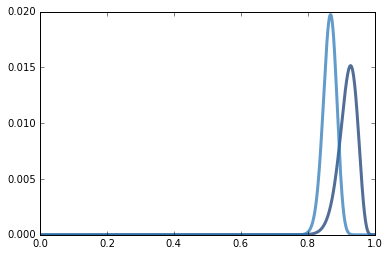

In [21]:
like1, Asmall = make_suite((81, 87), 'Asmall')
like2, Bsmall = make_suite((234, 270), 'Bsmall')
print(like1, like2)

thinkplot.Pdfs([Asmall, Bsmall])

1.1513810491603422e-81 8.21425029815597e-72


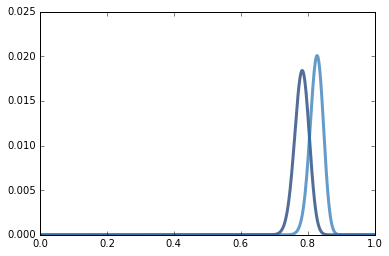

In [22]:
like1, Acombo = make_suite((273, 350), 'Acombo')
like2, Bcombo = make_suite((289, 350), 'Bcombo')
print(like1, like2)

thinkplot.Pdfs([Acombo, Bcombo])

In [23]:
import pandas as pd

In [24]:
iterables = [['A', 'B'], ['S', 'L'], ['pos', 'neg']]
index = pd.MultiIndex.from_product(iterables, names=['treatment', 'size', 'outcome'])

In [25]:
data = pd.Series([81, 6, 192, 71, 234, 36, 55, 25], index=index)
data.sort_index(inplace=True)

In [26]:
data

treatment  size  outcome
A          L     neg         71
                 pos        192
           S     neg          6
                 pos         81
B          L     neg         25
                 pos         55
           S     neg         36
                 pos        234
dtype: int64

In [27]:
data['A']

size  outcome
L     neg         71
      pos        192
S     neg          6
      pos         81
dtype: int64

In [28]:
data.loc['A', 'S']

outcome
neg     6
pos    81
dtype: int64

In [29]:
data.loc['A'].sum(axis=0) 

350

In [30]:
data.loc['B'].sum(axis=0) 

350

In [31]:
X = slice(None)
data.loc['A', X, 'pos'].sum()

273

In [32]:
indices = ['A', 'B']
for index in indices:
    print(data[index])

size  outcome
L     neg         71
      pos        192
S     neg          6
      pos         81
dtype: int64
size  outcome
L     neg         25
      pos         55
S     neg         36
      pos        234
dtype: int64


In [33]:
from itertools import product

for index in product('AB'):
    print(data[index])

size  outcome
L     neg         71
      pos        192
S     neg          6
      pos         81
dtype: int64
size  outcome
L     neg         25
      pos         55
S     neg         36
      pos        234
dtype: int64


In [34]:
indices = ['A', 'B']
for index in product('AB', 'SL'):
    print(data[index])

outcome
neg     6
pos    81
dtype: int64
outcome
neg     71
pos    192
dtype: int64
outcome
neg     36
pos    234
dtype: int64
outcome
neg    25
pos    55
dtype: int64


In [35]:
iterables = [['A', 'B'], ['S', 'L']]
index = pd.MultiIndex.from_product(iterables, names=['treatment', 'size'])

In [36]:
data = np.array([81, 6, 192, 71, 234, 36, 55, 25]).reshape((4, 2))
data

array([[ 81,   6],
       [192,  71],
       [234,  36],
       [ 55,  25]])

In [37]:
df = pd.DataFrame(data, index=index, columns=['pos', 'neg'])
df.sort_index(inplace=True)
df

pos  neg
treatment size          
A         L     192   71
          S      81    6
B         L      55   25
          S     234   36

In [38]:
df.loc['A']

,pos,neg
size,,
L,192,71
S,81,6


In [39]:
for index in product('AB'):
    print(index)
    print(df.loc[index])

('A',)
      pos  neg
size          
L     192   71
S      81    6
('B',)
      pos  neg
size          
L      55   25
S     234   36


In [40]:
for index in product('AB', 'SL'):
    print(index)
    group = df.loc[index]
    print(group.pos, group.neg)

('A', 'S')
81 6
('A', 'L')
192 71
('B', 'S')
234 36
('B', 'L')
55 25


In [45]:
from scipy import stats

class Model:
    def __init__(self, pos, neg, alphas=(0, 0)):
        self.pos = pos
        self.neg = neg
        self.beta = Beta(*alphas)
        self.beta.Update((pos, neg))
        self.pmf = self.beta.MakePmf(steps=101)
        del self.pmf[0]
        del self.pmf[1]
        
    def mean(self):
        return self.beta.Mean()
        
    def MAP(self):
        return self.beta.MAP()
        
    def deviance(self, p):
        k = self.pos
        n = self.pos + self.neg
        logprob = stats.binom.logpmf(k, n, p)
        return -2 * logprob
    
    def deviance_hat(self):
        return self.deviance(self.MAP())
    
    def deviance_avg(self):
        return self.pmf.Expect(self.deviance)
    
    def DIC(self):
        return 2 * self.deviance_hat() - self.deviance_avg()

In [69]:
def print_models(models):
    total = 0
    for index, model in sorted(models.items()):
        dic = model.DIC()
        total += dic
        print(index, model.deviance_hat(), model.deviance_avg(), dic)
    return total

In [70]:
models = {}
for index in product('AB', 'S'):
    group = df.loc[index]
    model = Model(group.pos, group.neg)
    models[index] = model
    
print_models(models)

('A', 'S') 3.73968463635 4.613932719 2.8654365537
('B', 'S') 5.30072011541 6.28774387726 4.31369635357


7.179

In [71]:
models = {}
for index in product('AB', 'L'):
    group = df.loc[index]
    model = Model(group.pos, group.neg)
    models[index] = model
    
print_models(models)

('A', 'L') 5.79263801099 6.79106173897 4.79421428301
('B', 'L') 4.6983284023 5.69728520317 3.69937160143


8.494

In [72]:
models = {}
for index in product('AB'):
    group = df.loc[index].sum()
    model = Model(group.pos, group.neg)
    models[index] = model

print_models(models)

('A',) 5.94082016741 6.93781870432 4.9438216305
('B',) 5.76864794303 6.76290986838 4.77438601769


9.718

In [73]:
# Encapsulate the model-building loop
# Run the same analysis on the batting averages